In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100

In [5]:
# test with 
from pm4py.objects.log.importer.csv import factory as csv_importer
ExcellentLogImport = csv_importer.import_event_stream('ExcellentCluster.csv')
MediumLogImport = csv_importer.import_event_stream('MediumCluster.csv')
WeakLogImport = csv_importer.import_event_stream('WeakCluster.csv')
from pm4py.objects.conversion.log import factory as conversion_factory
ExcellentLog = conversion_factory.apply(ExcellentLogImport)
MediumLog = conversion_factory.apply(MediumLogImport)
WeakLog = conversion_factory.apply(WeakLogImport)

# Variant analysis

In [6]:
from pm4py.statistics.traces.log import case_statistics

var_with_count_excellent = case_statistics.get_variant_statistics(ExcellentLog, parameters={"max_variants_to_return": 10})
var_with_count_medium = case_statistics.get_variant_statistics(MediumLog, parameters={"max_variants_to_return": 10})
var_with_count_weak = case_statistics.get_variant_statistics(WeakLog, parameters={"max_variants_to_return": 10})

# Process Discovery using existing algorithms

In [10]:
from pm4py.algo.discovery.alpha import factory as alpha_miner
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
from pm4py.objects.conversion.dfg import factory as dfg_mining_factory
from pm4py.algo.discovery.dfg import factory as dfg_factory

from pm4py.evaluation.generalization import factory as generalization_factory
from pm4py.evaluation.precision import factory as precision_factory
from pm4py.evaluation.simplicity import factory as simplicity_factory
from pm4py.evaluation.replay_fitness import factory as replay_factory

In [11]:
#Alpha miner
excellent_netAlpha, excellent_imAlpha, excellent_fmAlpha = alpha_miner.apply(ExcellentLog)
weak_netAlpha, weak_imAlpha, weak_fmAlpha = alpha_miner.apply(WeakLog)

excellent_fitness_alpha = replay_factory.apply(ExcellentLog, excellent_netAlpha, excellent_imAlpha, excellent_fmAlpha)
excellent_precision_alpha = precision_factory.apply(ExcellentLog, excellent_netAlpha, excellent_imAlpha, excellent_fmAlpha)
excellent_generalization_alpha = generalization_factory.apply(ExcellentLog, excellent_netAlpha, excellent_imAlpha, excellent_fmAlpha)
excellent_simplicity_alpha = simplicity_factory.apply(excellent_netAlpha)

weak_fitness_alpha = replay_factory.apply(WeakLog, weak_netAlpha, weak_imAlpha, weak_fmAlpha)
weak_precision_alpha = precision_factory.apply(WeakLog, weak_netAlpha, weak_imAlpha, weak_fmAlpha)
weak_generalization_alpha = generalization_factory.apply(WeakLog, weak_netAlpha, weak_imAlpha, weak_fmAlpha)
weak_simplicity_alpha = simplicity_factory.apply(weak_netAlpha)

#Heuristics Minier
#convert to Petri Net
excellent_netHeuristic, excellent_imHeuristic, excellent_fmHeuristic = heuristics_miner.apply(ExcellentLog, parameters={"dependency_thresh": 0.9})
weak_netHeuristic, weak_imHeuristic, weak_fmHeuristic = heuristics_miner.apply(WeakLog, parameters={"dependency_thresh": 0.9})

excellent_fitness_heuristics = replay_factory.apply(ExcellentLog, excellent_netHeuristic, excellent_imHeuristic, excellent_fmHeuristic)
excellent_precision_heuristics = precision_factory.apply(ExcellentLog, excellent_netHeuristic, excellent_imHeuristic, excellent_fmHeuristic)
excellent_generalization_heuristics = generalization_factory.apply(ExcellentLog, excellent_netHeuristic, excellent_imHeuristic, excellent_fmHeuristic)
excellent_simplicity_heuristics = simplicity_factory.apply(excellent_netHeuristic)

weak_fitness_heuristics = replay_factory.apply(WeakLog, weak_netHeuristic, weak_imHeuristic, weak_fmHeuristic)
weak_precision_heuristics = precision_factory.apply(WeakLog, weak_netHeuristic, weak_imHeuristic, weak_fmHeuristic)
weak_generalization_heuristics = generalization_factory.apply(WeakLog, weak_netHeuristic, weak_imHeuristic, weak_fmHeuristic)
weak_simplicity_heuristics = simplicity_factory.apply(weak_netHeuristic)

#DFG
excellent_dfgDFG = dfg_factory.apply(ExcellentLog)
excellent_netDFG, excellent_imDFG, excellent_fmDFG = dfg_mining_factory.apply(excellent_dfgDFG)
weak_dfgDFG = dfg_factory.apply(WeakLog)
weak_netDFG, weak_imDFG, weak_fmDFG = dfg_mining_factory.apply(weak_dfgDFG)

excellent_fitness_dfg = replay_factory.apply(ExcellentLog, excellent_netDFG, excellent_imDFG, excellent_fmDFG)
excellent_precision_dfg = precision_factory.apply(ExcellentLog, excellent_netDFG, excellent_imDFG, excellent_fmDFG)
excellent_generalization_dfg = generalization_factory.apply(ExcellentLog, excellent_netDFG, excellent_imDFG, excellent_fmDFG)
excellent_simplicity_dfg = simplicity_factory.apply(excellent_netDFG)

weak_fitness_dfg = replay_factory.apply(WeakLog, weak_netDFG, weak_imDFG, weak_fmDFG)
weak_precision_dfg = precision_factory.apply(WeakLog, weak_netDFG, weak_imDFG, weak_fmDFG)
weak_generalization_dfg = generalization_factory.apply(WeakLog, weak_netDFG, weak_imDFG, weak_fmDFG)
weak_simplicity_dfg = simplicity_factory.apply(weak_netDFG)

#Inductive
excellent_netInductive, excellent_imInductive, excellent_fmInductive = inductive_miner.apply(ExcellentLog)
weak_netInductive, weak_imInductive, weak_fmInductive = inductive_miner.apply(WeakLog)

excellent_fitness_inductive = replay_factory.apply(ExcellentLog, excellent_netInductive, excellent_imInductive, excellent_fmInductive)
excellent_precision_inductive = precision_factory.apply(ExcellentLog, excellent_netInductive, excellent_imInductive, excellent_fmInductive)
excellent_generalization_inductive = generalization_factory.apply(ExcellentLog, excellent_netInductive, excellent_imInductive, excellent_fmInductive)
excellent_simplicity_inductive = simplicity_factory.apply(excellent_netInductive)

weak_fitness_inductive = replay_factory.apply(WeakLog, weak_netInductive, weak_imInductive, weak_fmInductive)
weak_precision_inductive = precision_factory.apply(WeakLog, weak_netInductive, weak_imInductive, weak_fmInductive)
weak_generalization_inductive = generalization_factory.apply(WeakLog, weak_netInductive, weak_imInductive, weak_fmInductive)
weak_simplicity_inductive = simplicity_factory.apply(weak_netInductive)

In [12]:
print('Alpha--------------------------------------')
print('Excellent -----')
print('Replay fitness:', excellent_fitness_alpha)
print('Precision:', excellent_precision_alpha)
print('Generalisation:', excellent_generalization_alpha)
print('Simplicity:', excellent_simplicity_alpha)
avg = (excellent_fitness_alpha['log_fitness'] + excellent_precision_alpha + excellent_generalization_alpha + excellent_simplicity_alpha)/4
print('Average ratio:', avg)
print('\n')
print('Weak -----')
print('Replay fitness:', weak_fitness_alpha)
print('Precision:', weak_precision_alpha)
print('Generalisation:', weak_generalization_alpha)
print('Simplicity:', weak_simplicity_alpha)
avg = (weak_fitness_alpha['log_fitness'] + weak_precision_alpha + weak_generalization_alpha + weak_simplicity_alpha)/4
print('Average ratio:', avg)
print('\n')
print('Heuristics--------------------------------------')
print('Excellent -----')
print('Replay fitness:', excellent_fitness_heuristics)
print('Precision:', excellent_precision_heuristics)
print('Generalisation:', excellent_generalization_heuristics)
print('Simplicity:', excellent_simplicity_heuristics)
avg = (excellent_fitness_heuristics['log_fitness'] + excellent_precision_heuristics + excellent_generalization_heuristics + excellent_simplicity_heuristics)/4
print('Average ratio:', avg)
print('\n')
print('Weak -----')
print('Replay fitness:', weak_fitness_heuristics)
print('Precision:', weak_precision_heuristics)
print('Generalisation:', weak_generalization_heuristics)
print('Simplicity:', weak_simplicity_heuristics)
avg = (weak_fitness_heuristics['log_fitness'] + weak_precision_heuristics + weak_generalization_heuristics + weak_simplicity_heuristics)/4
print('Average ratio:', avg)
print('\n')
print('Inductive--------------------------------------')
print('Excellent -----')
print('Replay fitness:', excellent_fitness_inductive)
print('Precision:', excellent_precision_inductive)
print('Generalisation:', excellent_generalization_inductive)
print('Simplicity:', excellent_simplicity_inductive)
avg = (excellent_fitness_inductive['log_fitness'] + excellent_precision_inductive + excellent_generalization_inductive + excellent_simplicity_inductive)/4
print('Average ratio:', avg)
print('\n')
print('Weak -----')
print('Replay fitness:', weak_fitness_inductive)
print('Precision:', weak_precision_inductive)
print('Generalisation:', weak_generalization_inductive)
print('Simplicity:', weak_simplicity_inductive)
avg = (weak_fitness_inductive['log_fitness'] + weak_precision_inductive + weak_generalization_inductive + weak_simplicity_inductive)/4
print('Average ratio:', avg)
print('\n')
print('DFG--------------------------------------')
print('Excellent -----')
print('Replay fitness:', excellent_fitness_dfg)
print('Precision:', excellent_precision_dfg)
print('Generalisation:', excellent_generalization_dfg)
print('Simplicity:', excellent_simplicity_dfg)
avg = (excellent_fitness_dfg['log_fitness'] + excellent_precision_dfg + excellent_generalization_dfg + excellent_simplicity_dfg)/4
print('Average ratio:', avg)
print('\n')
print('Weak 2A-----')
print('Replay fitness:', weak_fitness_dfg)
print('Precision:', weak_precision_dfg)
print('Generalisation:', weak_generalization_dfg)
print('Simplicity:', weak_simplicity_dfg)
avg = (weak_fitness_dfg['log_fitness'] + weak_precision_dfg + weak_generalization_dfg + weak_simplicity_dfg)/4
print('Average ratio:', avg)

Alpha--------------------------------------
Excellent -----
Replay fitness: {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}
Precision: 0.5615088883990509
Generalisation: 0.9901671599567191
Simplicity: 0.7692307692307692
Average ratio: 0.8302267043966348


Weak -----
Replay fitness: {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}
Precision: 0.5315960476378896
Generalisation: 0.9854260077186543
Simplicity: 0.7692307692307692
Average ratio: 0.8215632061468283


Heuristics--------------------------------------
Excellent -----
Replay fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.4921116076179994, 'log_fitness': 0.6577371584269442}
Precision: 0.7856151108965642
Generalisation: 0.9760935191551636
Simplicity: 0.5428571428571428
Average ratio: 0.7405757328339537


Weak -----
Replay fitness: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5618005868224178, 'log_fitness': 0.7172695519082697}
Precision: 0.6879098234983871

In [13]:
from pm4py.objects.petri.check_soundness import check_wfnet
from pm4py.objects.petri.check_soundness import check_petri_wfnet_and_soundness

In [14]:
print('---Alpha-----------')
print('---Excellent-----------')
print('Number of places:', len(excellent_netAlpha.places))
print('Number of transitions:', len(excellent_netAlpha.transitions))
print('Number of arcs:', len(excellent_netAlpha.arcs))
is_wfnet = check_wfnet(excellent_netAlpha)
is_soundwfnet = check_petri_wfnet_and_soundness(excellent_netAlpha)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Weak-----------')
print('Number of places:', len(weak_netAlpha.places))
print('Number of transitions:', len(weak_netAlpha.transitions))
print('Number of arcs:', len(weak_netAlpha.arcs))
is_wfnet = check_wfnet(weak_netAlpha)
is_soundwfnet = check_petri_wfnet_and_soundness(weak_netAlpha)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Heuristics-----------')
print('---Excellent-----------')
print('Number of places:', len(excellent_netHeuristic.places))
print('Number of transitions:', len(excellent_netHeuristic.transitions))
print('Number of arcs:', len(excellent_netHeuristic.arcs))
is_wfnet = check_wfnet(excellent_netHeuristic)
is_soundwfnet = check_petri_wfnet_and_soundness(excellent_netHeuristic)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Weak-----------')
print('Number of places:', len(weak_netHeuristic.places))
print('Number of transitions:', len(weak_netHeuristic.transitions))
print('Number of arcs:', len(weak_netHeuristic.arcs))
is_wfnet = check_wfnet(weak_netHeuristic)
is_soundwfnet = check_petri_wfnet_and_soundness(weak_netHeuristic)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Inductive-----------')
print('---Excellent-----------')
print('Number of places:', len(excellent_netInductive.places))
print('Number of transitions:', len(excellent_netInductive.transitions))
print('Number of arcs:', len(excellent_netInductive.arcs))
is_wfnet = check_wfnet(excellent_netInductive)
is_soundwfnet = check_petri_wfnet_and_soundness(excellent_netInductive)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Weak-----------')
print('Number of places:', len(weak_netInductive.places))
print('Number of transitions:', len(weak_netInductive.transitions))
print('Number of arcs:', len(weak_netInductive.arcs))
is_wfnet = check_wfnet(weak_netInductive)
is_soundwfnet = check_petri_wfnet_and_soundness(weak_netInductive)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---DFG-----------')
print('---Excellent-----------')
print('Number of places:', len(excellent_netDFG.places))
print('Number of transitions:', len(excellent_netDFG.transitions))
print('Number of arcs:', len(excellent_netDFG.arcs))
is_wfnet = check_wfnet(excellent_netDFG)
is_soundwfnet = check_petri_wfnet_and_soundness(excellent_netDFG)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Weak-----------')
print('Number of places:', len(weak_netDFG.places))
print('Number of transitions:', len(weak_netDFG.transitions))
print('Number of arcs:', len(weak_netDFG.arcs))
is_wfnet = check_wfnet(weak_netDFG)
is_soundwfnet = check_petri_wfnet_and_soundness(weak_netDFG)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

---Alpha-----------
---Excellent-----------
Number of places: 3
Number of transitions: 10
Number of arcs: 4
is Workflow net: False
is soundness: False
---Weak-----------
Number of places: 3
Number of transitions: 10
Number of arcs: 4
is Workflow net: False
is soundness: False
---Heuristics-----------
---Excellent-----------
Number of places: 48
Number of transitions: 57
Number of arcs: 132
is Workflow net: False
is soundness: False
---Weak-----------
Number of places: 48
Number of transitions: 63
Number of arcs: 142
is Workflow net: False
is soundness: False
---Inductive-----------
---Excellent-----------
Number of places: 44
Number of transitions: 45
Number of arcs: 104
is Workflow net: True
is soundness: True
---Weak-----------
Number of places: 44
Number of transitions: 45
Number of arcs: 104
is Workflow net: True
is soundness: True
---DFG-----------
---Excellent-----------
Number of places: 12
Number of transitions: 83
Number of arcs: 166
is Workflow net: True
is soundness: False
-

# FCA

16	focus-blur	0.056908
32	click-0-scroll	0.056843
10	scroll-blur	0.056595
21	blur-focus	0.055026
14	focus-scroll	0.051407
6	load-click-0	0.051075
12	scroll-click-0	0.050899
18	focus-click-0	0.050448
11	scroll-unload	0.048891
36	click-0-click-0	0.042374
2	load-scroll	0.041353
33	click-0-focus	0.041221
20	blur-scroll	0.041206
8	scroll-scroll	0.040780
35	click-0-unload	0.040168
23	blur-unload	0.039036
17	focus-unload	0.037182
34	click-0-blur	0.034836
4	load-blur	0.034597
9	scroll-focus	0.031344
22	blur-blur	0.029166

In [15]:
from collections import Counter 
weak_dfgFCA = Counter({('focus','blur') : 1, 
               ('click-0','scroll') : 1,  
                ('scroll','blur') : 1, 
               ('blur','focus') : 1,  
                ('focus','scroll') : 1, 
               ('load','click-0') : 1,
               ('scroll','click-0') : 1,
                ('focus','click-0') : 1,
                ('scroll','unload') : 1, 
               ('click-0','click-0') : 1,  
               ('load','scroll') : 1,
              ('click-0','focus') : 1, 
               ('blur','scroll') : 1,
             ('scroll','scroll') : 1,
             ('click-0','unload') : 1,
             ('blur','unload') : 1,
             ('focus','unload') : 1,
             ('click-0','blur') : 1,
            ('load','blur') : 1,
             ('scroll','focus') : 1,
            ('blur','blur') : 1
                }) 
weak_netFCA, weak_imFCA, weak_fmFCA = dfg_mining_factory.apply(weak_dfgFCA)

excellent_dfgFCA = Counter({('blur','unload') : 1, 
               ('focus','selection') : 1,  
                ('scroll','selection') : 1, 
               ('selection','blur') : 1,  
                ('selection','scroll') : 1, 
               ('scroll','blur') : 1,
               ('blur','selection') : 1,
                ('selection','focus') : 1,
                ('blur','focus') : 1, 
               ('load','selection') : 1,  
               ('load','scroll') : 1,
              ('selection','unload') : 1, 
               ('load','blur') : 1,
             ('focus','scroll') : 1,
             ('focus','blur') : 1,
             ('focus','unload') : 1,
             ('scroll','scroll') : 1,
             ('blur','scroll') : 1,
            ('load','unload') : 1,
             ('scroll','unload') : 1
                }) 
excellent_netFCA, excellent_imFCA, excellent_fmFCA = dfg_mining_factory.apply(excellent_dfgFCA)

In [17]:
from pm4py.evaluation import factory as evaluation_factory

excellent_alpha_evaluation_result = evaluation_factory.apply(ExcellentLog, excellent_netFCA, excellent_imFCA, excellent_fmFCA)
print("Excellent result=",excellent_alpha_evaluation_result)
weak_alpha_evaluation_result = evaluation_factory.apply(WeakLog, weak_netFCA, weak_imFCA, weak_fmFCA)
print("Weak result=",weak_alpha_evaluation_result)

Excellent result= {'fitness': {'perc_fit_traces': 17.959167040221686, 'average_trace_fitness': 0.6875824534639582, 'log_fitness': 0.5230963511692732}, 'precision': 0.9491517088763216, 'generalization': 0.3163876093659522, 'simplicity': 0.7333333333333333, 'metricsAverageWeight': 0.6304922506862201}
Weak result= {'fitness': {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.699353127855338, 'log_fitness': 0.6911054908171225}, 'precision': 0.9167907859879708, 'generalization': 0.3024754817294676, 'simplicity': 0.7419354838709677, 'metricsAverageWeight': 0.6630768106013822}


In [16]:
print('---FCA-----------')
print('---Excellent-----------')
print('Number of places:', len(excellent_netFCA.places))
print('Number of transitions:', len(excellent_netFCA.transitions))
print('Number of arcs:', len(excellent_netFCA.arcs))
is_wfnet = check_wfnet(excellent_netFCA)
is_soundwfnet = check_petri_wfnet_and_soundness(excellent_netFCA)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

print('---Weak-----------')
print('Number of places:', len(weak_netFCA.places))
print('Number of transitions:', len(weak_netFCA.transitions))
print('Number of arcs:', len(weak_netFCA.arcs))
is_wfnet = check_wfnet(weak_netFCA)
is_soundwfnet = check_petri_wfnet_and_soundness(weak_netFCA)
print('is Workflow net:',is_wfnet)
print('is soundness:',is_soundwfnet)

---FCA-----------
---Excellent-----------
Number of places: 8
Number of transitions: 22
Number of arcs: 44
is Workflow net: True
is soundness: False
---Weak-----------
Number of places: 8
Number of transitions: 23
Number of arcs: 46
is Workflow net: True
is soundness: False


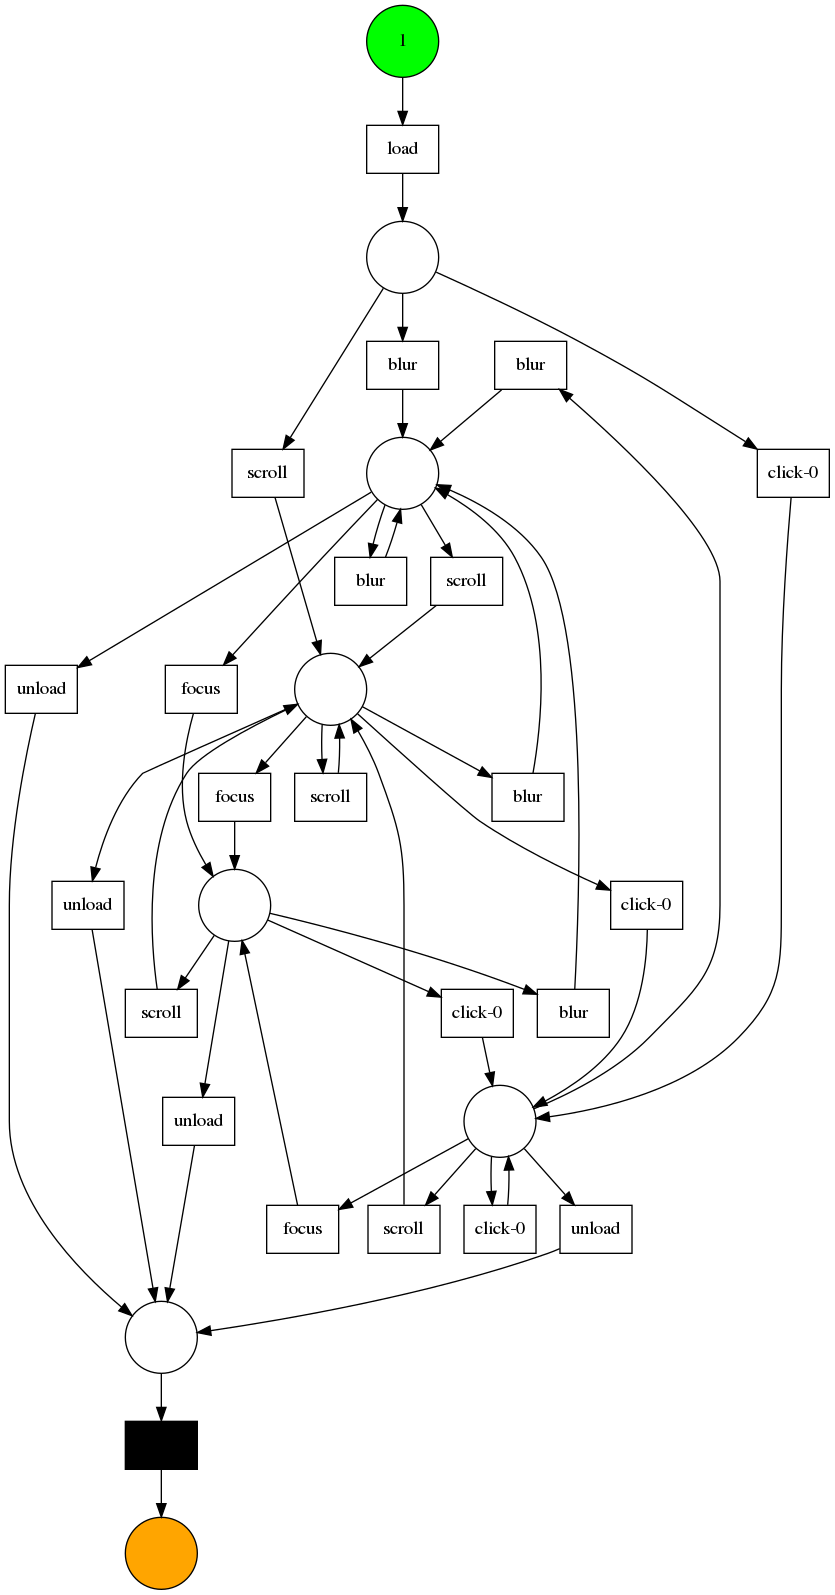

In [19]:
from pm4py.visualization.petrinet import factory as pn_vis_factory
gvizFCA = pn_vis_factory.apply(weak_netFCA, weak_imFCA, weak_fmFCA)
pn_vis_factory.view(gvizFCA)

In [20]:
from pm4py.objects.petri.exporter import pnml as pnml_exporter
pnml_exporter.export_net(weak_netFCA, weak_imFCA, 'WeakCluster.pnml', final_marking=weak_fmFCA)
pnml_exporter.export_net(excellent_netFCA, excellent_imFCA, 'ExcellentCluster.pnml', final_marking=excellent_fmFCA)

/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function export_net.
  
/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function export_net.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
pnml_exporter.export_net(weak_netInductive, weak_imInductive, 'WeakCluster_inductive.pnml', final_marking=weak_fmInductive)
pnml_exporter.export_net(excellent_netInductive, excellent_imInductive, 'ExcellentCluster_inductive.pnml', final_marking=excellent_fmInductive)

/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function export_net.
  """Entry point for launching an IPython kernel.
/home/tai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated function export_net.
  


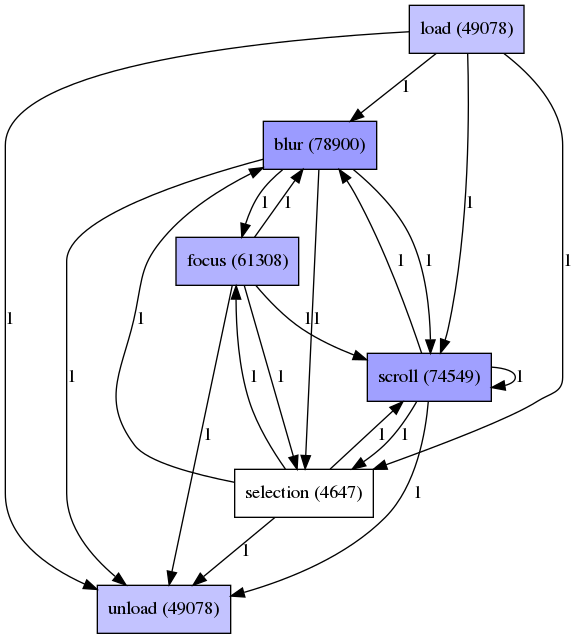

In [26]:
from pm4py.visualization.dfg import factory as dfg_vis_factory

gviz = dfg_vis_factory.apply(excellent_dfgFCA, log=ExcellentLog, variant="frequency")
dfg_vis_factory.view(gviz)

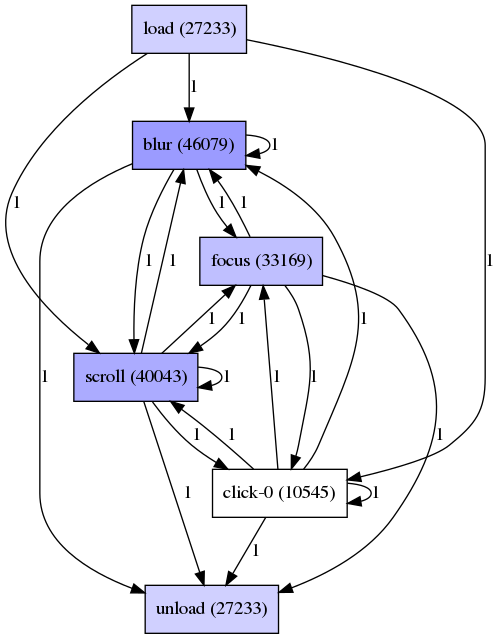

In [24]:
gviz = dfg_vis_factory.apply(weak_dfgFCA, log=WeakLog, variant="frequency")
dfg_vis_factory.view(gviz)

13	scroll-scroll	0.052146
14	scroll-blur	0.096448
15	scroll-focus	0.062850
17	scroll-hashchange	0.019489
18	scroll-click-0	0.018635
19	scroll-selection	0.034553
24	blur-scroll	0.066471
26	blur-focus	0.089327
29	blur-click-0	0.012416
30	blur-selection	0.014771
35	focus-scroll	0.092325
36	focus-blur	0.071566
40	focus-click-0	0.019280
41	focus-selection	0.037258
57	hashchange-scroll	0.027868
62	hashchange-click-0	0.009761
68	click-0-scroll	0.027933
70	click-0-focus	0.023672
72	click-0-hashchange	0.023298
73	click-0-click-0	0.009273
79	selection-scroll	0.022833
80	selection-blur	0.042003
81	selection-focus	0.015867
85	selection-selection	0.010501
90	click-2-scroll	0.008676

In [ ]:
excellent_dfgFCA = Counter({('scroll','scroll') : 1, 
               ('focus','selection') : 1,  
                ('scroll','selection') : 1, 
               ('selection','blur') : 1,  
                ('selection','scroll') : 1, 
               ('scroll','blur') : 1,
               ('blur','selection') : 1,
                ('selection','focus') : 1,
                ('blur','focus') : 1, 
               ('load','selection') : 1,  
               ('load','scroll') : 1,
              ('selection','unload') : 1, 
               ('load','blur') : 1,
             ('focus','scroll') : 1,
             ('focus','blur') : 1,
             ('focus','unload') : 1,
             ('scroll','scroll') : 1,
             ('blur','scroll') : 1,
            ('load','unload') : 1,
             ('scroll','unload') : 1
                }) 
excellent_netFCA, excellent_imFCA, excellent_fmFCA = dfg_mining_factory.apply(excellent_dfgFCA)